In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pwd

'/home/bene/projects/generative-models/examples/world_model/experiments'

In [3]:
%cd ../../..
%pwd

/home/bene/projects/generative-models


'/home/bene/projects/generative-models'

In [4]:
from examples.world_model.vae.v_model import VModel
from examples.world_model.util.logger import Logger

import numpy as np

import matplotlib.pyplot as plt
from ipywidgets import interact

import torch
from torch.utils.data import TensorDataset, DataLoader

In [5]:
DATA_PATH = 'examples/dataset/world_model/car_racing-random_walker.h5'
MODEL_PATH = 'examples/models/world_model/car_racing/v_model/'

LEARNING_RATE = 1e-4
BATCH_SIZE = 64
VALID_SIZE = 0.1
WORKER = 12

LATENT_DIM = 32
BETA = 5000

In [6]:
data = Logger().load_history(DATA_PATH)

In [7]:
@interact(x=True, y=1.0)
def show_episode(episode=range(len(data)),
                 step=(0, len(data[0]['action']), 1),
                 true_colors=False,
                ):
    try:
        plt.figure(figsize=(10, 10))
        frame = data[episode]['observation'][step].transpose((1,2,0))/255.
        if true_colors:
            frame = 1 - frame
        plt.imshow(frame)        
        
        r = world.log_history[episode]['reward'][step]
        left_right = world.log_history[episode]['action'][step][0]
        gas = world.log_history[episode]['action'][step][1]
        brake = world.log_history[episode]['action'][step][2]
        plt.title(f'r: {r:.2f}, L/R: {left_right:.2f}, G: {gas:.2f}, B: {brake:.2f}')
        plt.xticks([])
        plt.yticks([])
    except:
        pass

interactive(children=(Dropdown(description='episode', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…

In [8]:
observation = torch.Tensor(np.concatenate([d['observation'] for d in data])/255.)
observation.shape, observation.min(), observation.max()

(torch.Size([92276, 3, 64, 64]), tensor(0.), tensor(1.))

In [9]:
action = torch.Tensor(np.concatenate([d['action'] for d in data]))
action.shape

torch.Size([92276, 3])

In [10]:
reward = torch.Tensor(np.concatenate([d['reward'] for d in data]))
reward.shape

torch.Size([92276])

In [11]:
dataset = TensorDataset(observation, reward)

In [12]:
train_size = int(len(dataset)*(1.-VALID_SIZE))
valid_size = len(dataset) - train_size

train_dataset, valid_dataset = torch.utils.data.random_split(dataset, [train_size, valid_size])

In [13]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=BATCH_SIZE,
                                           num_workers=WORKER,
                                           pin_memory=True,
                                           shuffle=True)

valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset,
                                           batch_size=BATCH_SIZE,
                                           num_workers=WORKER,
                                           pin_memory=True,
                                           shuffle=False)

In [14]:
model = VModel(latent_dim=LATENT_DIM,
               batch_size=BATCH_SIZE,
               learning_rate=LEARNING_RATE,
               beta=BETA,
               model_path=MODEL_PATH,
              )

model

VModel(
  (encoder): ConvEncoder(
    (conv_0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), padding_mode=replicate)
    (batch_norm_0): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (drop_0): Dropout(p=0.25, inplace=False)
    (conv_1): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), padding_mode=replicate)
    (batch_norm_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (drop_1): Dropout(p=0.25, inplace=False)
    (conv_2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), padding_mode=replicate)
    (batch_norm_2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (drop_2): Dropout(p=0.25, inplace=False)
    (conv_3): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), padding_mode=replicate)
    (batch_norm_3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (drop_3

In [15]:
input_shape = model.encoder.conv_stack_shape_in

device = 'cpu'
if torch.cuda.is_available():
    print (f'GPU available')
    device = 'cuda'

x_random = torch.rand((1, *input_shape))
"input shape:", input_shape

GPU available


('input shape:', (3, 64, 64))

In [16]:
x_random = x_random  # .to(device)
"output shape:", model.forward(x_random).shape

('output shape:', torch.Size([1, 3, 64, 64]))

In [25]:
model.fit(
    max_epochs=100,
    train_dataloader=train_loader,
    val_dataloader=valid_loader,
    model_path=MODEL_PATH,    
)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
Using native 16bit precision.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


initialize checkpoints
initialize trainer
GPU available
start training



  | Name    | Type         | Params
-----------------------------------------
0 | encoder | ConvEncoder  | 953 K 
1 | decoder | ConvTDecoder | 825 K 
-----------------------------------------
1.8 M     Trainable params
1         Non-trainable params
1.8 M     Total params
7.115     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

done


VModel(
  (encoder): ConvEncoder(
    (conv_0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), padding_mode=replicate)
    (batch_norm_0): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (drop_0): Dropout(p=0.25, inplace=False)
    (conv_1): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), padding_mode=replicate)
    (batch_norm_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (drop_1): Dropout(p=0.25, inplace=False)
    (conv_2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), padding_mode=replicate)
    (batch_norm_2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (drop_2): Dropout(p=0.25, inplace=False)
    (conv_3): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), padding_mode=replicate)
    (batch_norm_3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (drop_3

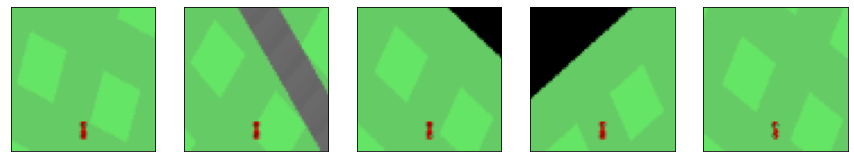

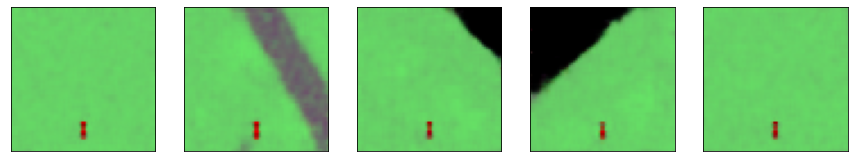

In [30]:
offset = 30

for batch_features, __ in valid_loader:
    out = model.forward(batch_features)
    
    f, axes = plt.subplots(1, 5, figsize=(15, 5))
    for i, ax in enumerate(axes):
        ax.imshow(1-batch_features[i+offset].detach().numpy().transpose(1,2,0), cmap='binary')
        ax.set_xticks([]); ax.set_yticks([])
     
    f, axes = plt.subplots(1, 5, figsize=(15, 5))
    for i, ax in enumerate(axes):
        ax.imshow(1-out[i+offset].detach().numpy().transpose(1,2,0), cmap='binary')
        ax.set_xticks([]); ax.set_yticks([])
        
    break